In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model, model_selection, metrics


In [60]:
insurance = pd.read_csv('insurance.csv')
insurance.shape

(1338, 7)

In [61]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [62]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


<AxesSubplot:xlabel='bmi', ylabel='charges'>

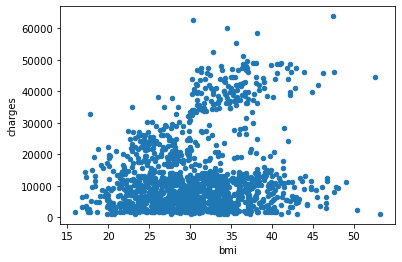

In [63]:
insurance.plot.scatter("bmi", "charges")

In [64]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(insurance.bmi, insurance.charges, test_size = 0.3)

In [65]:
regr = linear_model.LinearRegression()

In [66]:
regr.fit(np.array(x_train).reshape(-1,1), y_train)

LinearRegression()

In [67]:
preds = regr.predict(np.array(x_test).reshape(-1,1))

In [68]:
y_test.head()

1147     2261.56880
164      5028.14660
799     17904.52705
554     17878.90068
569     45702.02235
Name: charges, dtype: float64

In [69]:
preds

array([13771.893608  , 12971.65340539, 11271.14297483, 17072.8844438 ,
       16806.13770959, 11938.00981034, 12066.11843927, 10537.58945576,
       10770.99284819, 13338.43016492, 12604.87664585, 11204.45629127,
       12954.10427814, 16713.12733516, 14958.21461013, 11834.46995956,
       12371.47325342, 15926.92643435, 11604.57639258, 15695.27795464,
       12683.84771848, 11604.57639258, 14080.75824761, 11037.7395824 ,
       16197.182994  , 14382.60323631, 12887.41759458, 11004.39624062,
       13105.02677249, 12171.41320277, 13069.92851799, 10037.43932913,
       10137.46935445, 14605.47715239, 14238.70039286, 10985.09220064,
        9770.69259492, 19208.61323016, 14498.42747617, 11471.20302548,
       13571.83355735, 10837.67953174, 14338.73041819, 10504.24611398,
       12466.23854058, 13771.893608  , 15502.23755489, 13505.1468738 ,
       14438.76044352, 13659.5791936 , 16042.7506742 , 14961.72443558,
       13771.893608  , 12571.53330408, 14614.25171602, 12504.84662053,
      

(array([  2.,   2.,  15.,  29.,   7.,  30.,  35., 105., 151.,  26.]),
 array([-44561.81477984, -38324.33568297, -32086.8565861 , -25849.37748923,
        -19611.89839237, -13374.4192955 ,  -7136.94019863,   -899.46110177,
          5338.0179951 ,  11575.49709197,  17812.97618884]),
 <BarContainer object of 10 artists>)

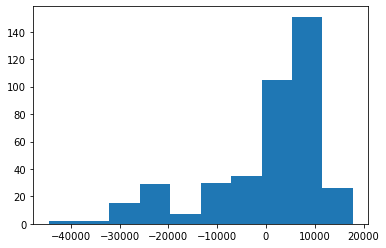

In [70]:
residuals = preds - y_test
plt.hist(residuals)

In [71]:
metrics.mean_squared_error(y_test, preds) ** 0.5

11601.42804120177

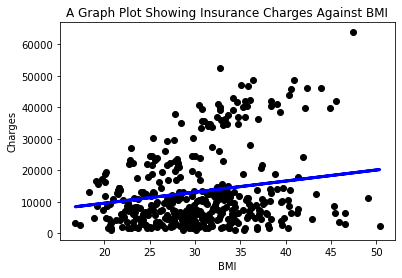

In [72]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, preds, color='blue', linewidth=3)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('A Graph Plot Showing Insurance Charges Against BMI')
plt.show()